In [1]:
##heart_disease_post covid.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data Loading

In [2]:
# read in the data from a CSV file

data = pd.read_csv('heart_disease_post covid.csv')
print(data.head())
print(data.info())

   Covid_Recovered  HighBP  HighChol  CholCheck   Age  Smoker  History_Stroke  \
0           2022.0    36.0      25.0        1.0  46.0    94.0            49.0   
1           2020.0    48.0      62.0        0.0  62.0    19.0            30.0   
2           2021.0    16.0      62.0        1.0  51.0    54.0            28.0   
3           2020.0     4.0      61.0        1.0  66.0    47.0            12.0   
4           2020.0    37.0      77.0        1.0  78.0    68.0            43.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0      69.0           0.0     0.0  ...            1.0          0.0      1.0   
1     100.0           1.0     0.0  ...            0.0          1.0      0.0   
2      91.0           0.0     1.0  ...            1.0          1.0      1.0   
3       7.0           1.0     1.0  ...            1.0          0.0      1.0   
4       8.0           1.0     1.0  ...            1.0          0.0      1.0   

   MentHlth  PhysHlthcases  DiffWalk  

# Data Cleansing

1. NULL Validation

In [3]:
#Checking for the presence of null in actual dataset
null_count = data.isnull().sum()

In [4]:
print("Count of null values in each column:")
print(null_count)

Count of null values in each column:
Covid_Recovered         1
HighBP                  4
HighChol                4
CholCheck               4
Age                     4
Smoker                  4
History_Stroke          4
Diabetes                4
PhysActivity            4
Fruits                  4
Veggies                 4
HvyAlcoholConsump       4
AnyHealthcare           4
NoDocbcCost             4
GenHlth                 4
MentHlth                4
PhysHlthcases           4
DiffWalk                4
Sex                     4
Education               4
Income                  4
HeartDiseaseorAttack    4
dtype: int64


In [5]:
# Replace null values with the mode of each column
df1 = data.fillna(data.mode().iloc[0])

# Display the DataFrame after filling null values with mode
print("DataFrame after replacing null values with mode:")
print(df1)

DataFrame after replacing null values with mode:
        Covid_Recovered  HighBP  HighChol  CholCheck   Age  Smoker  \
0                2022.0    36.0      25.0        1.0  46.0    94.0   
1                2020.0    48.0      62.0        0.0  62.0    19.0   
2                2021.0    16.0      62.0        1.0  51.0    54.0   
3                2020.0     4.0      61.0        1.0  66.0    47.0   
4                2020.0    37.0      77.0        1.0  78.0    68.0   
...                 ...     ...       ...        ...   ...     ...   
253675           2022.0    44.0      82.0        1.0  43.0     7.0   
253676           2022.0    47.0      67.0        1.0  77.0    74.0   
253677           2022.0    33.0      62.0        1.0  59.0    12.0   
253678           2022.0    37.0      58.0        1.0  33.0    48.0   
253679           2022.0     4.0      13.0        1.0  68.0    19.0   

        History_Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0                 49.0      69.0

In [6]:
#Rechecking the presence of null after imputation with the mode
null_count = df1.isnull().sum()

In [7]:
# printing the count of replaced nulls in the new df
print("Count of null values in each column:")
print(null_count)

Count of null values in each column:
Covid_Recovered         0
HighBP                  0
HighChol                0
CholCheck               0
Age                     0
Smoker                  0
History_Stroke          0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlthcases           0
DiffWalk                0
Sex                     0
Education               0
Income                  0
HeartDiseaseorAttack    0
dtype: int64


Duplicate Validation

In [8]:
#2. Duplicate validation
# Check for duplicate rows
duplicate_rows = df1[df1.duplicated()]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
      Covid_Recovered  HighBP  HighChol  CholCheck   Age  Smoker  \
1059           2020.0    12.0      43.0        1.0  30.0    41.0   
1060           2020.0    12.0      43.0        1.0  30.0    41.0   
1061           2020.0    12.0      43.0        1.0  30.0    41.0   
1258           2022.0    43.0      85.0        1.0  74.0     9.0   
1259           2022.0    43.0      85.0        1.0  74.0     9.0   
1260           2022.0    43.0      85.0        1.0  74.0     9.0   
1261           2022.0    43.0      85.0        1.0  74.0     9.0   
1291           2022.0    42.0      17.0        1.0  60.0    47.0   
1292           2022.0    42.0      17.0        1.0  60.0    47.0   
1305           2022.0    42.0      17.0        1.0  60.0    47.0   

      History_Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
1059            53.0      49.0           1.0     1.0  ...            1.0   
1060            53.0      49.0           1.0     1.0  ...            1.0   
1061   

In [9]:
# Count the number of duplicate rows
duplicate_count = df1.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 10


In [10]:
# Remove duplicate rows
df = df1.drop_duplicates()

# Display the DataFrame without duplicates
print("DataFrame without duplicate rows:")
print(df)

DataFrame without duplicate rows:
        Covid_Recovered  HighBP  HighChol  CholCheck   Age  Smoker  \
0                2022.0    36.0      25.0        1.0  46.0    94.0   
1                2020.0    48.0      62.0        0.0  62.0    19.0   
2                2021.0    16.0      62.0        1.0  51.0    54.0   
3                2020.0     4.0      61.0        1.0  66.0    47.0   
4                2020.0    37.0      77.0        1.0  78.0    68.0   
...                 ...     ...       ...        ...   ...     ...   
253675           2022.0    44.0      82.0        1.0  43.0     7.0   
253676           2022.0    47.0      67.0        1.0  77.0    74.0   
253677           2022.0    33.0      62.0        1.0  59.0    12.0   
253678           2022.0    37.0      58.0        1.0  33.0    48.0   
253679           2022.0     4.0      13.0        1.0  68.0    19.0   

        History_Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0                 49.0      69.0           0.0 

In [11]:
# ReCheck for duplicate rows
duplicate_rows1 = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicate_rows1)

Duplicate rows:
Empty DataFrame
Columns: [Covid_Recovered, HighBP, HighChol, CholCheck, Age, Smoker, History_Stroke, Diabetes, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlthcases, DiffWalk, Sex, Education, Income, HeartDiseaseorAttack]
Index: []

[0 rows x 22 columns]


In [12]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


# EDA

In [13]:
df

Covid_Recovered  HighBP  HighChol  CholCheck   Age  Smoker  \
0                2022.0    36.0      25.0        1.0  46.0    94.0   
1                2020.0    48.0      62.0        0.0  62.0    19.0   
2                2021.0    16.0      62.0        1.0  51.0    54.0   
3                2020.0     4.0      61.0        1.0  66.0    47.0   
4                2020.0    37.0      77.0        1.0  78.0    68.0   
...                 ...     ...       ...        ...   ...     ...   
253675           2022.0    44.0      82.0        1.0  43.0     7.0   
253676           2022.0    47.0      67.0        1.0  77.0    74.0   
253677           2022.0    33.0      62.0        1.0  59.0    12.0   
253678           2022.0    37.0      58.0        1.0  33.0    48.0   
253679           2022.0     4.0      13.0        1.0  68.0    19.0   

        History_Stroke  Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  \
0                 49.0      69.0           0.0     0.0  ...            1.0   
1                 30.0     100.0           1.0     0.0  ...            0.0   
2                 28.0      91.0           0.0     1.0  ...            1.0   
3                 12.0       7.0           1.0     1.0  ...            1.0   
4                 43.0       8.0           1.0     1.0  ...            1.0   
...                ...       ...           ...     ...  ...            ...   
253675             5.0      72.0           0.0     1.0  ...            1.0   
253676            55.0      45.0           0.0     0.0  ...            1.0   
253677            26.0      28.0           1.0     1.0  ...            1.0   
253678            56.0      43.0           0.0     1.0  ...            1.0   
253679             0.0      34.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlthcases  DiffWalk  Sex  \
0               0.0      1.0       1.0           15.0       1.0  0.0   
1               1.0      0.0       0.0            0.0       0.0  0.0   
2               1.0      1.0       0.0           30.0       1.0  0.0   
3               0.0      1.0       0.0            0.0       0.0  0.0   
4               0.0      1.0       0.0            0.0       0.0  0.0   
...             ...      ...       ...            ...       ...  ...   
253675          0.0      0.0       0.0            5.0       0.0  1.0   
253676          0.0      1.0       0.0            0.0       1.0  0.0   
253677          0.0      1.0       0.0            0.0       0.0  0.0   
253678          0.0      0.0       0.0            0.0       0.0  1.0   
253679          0.0      1.0       0.0            0.0       0.0  0.0   

        Education  Income  HeartDiseaseorAttack  
0             4.0     3.0                   0.0  
1             6.0     1.0                   0.0  
2             4.0     8.0                   0.0  
3             3.0     6.0                   0.0  
4             5.0     4.0                   0.0  
...           ...     ...                   ...  
253675        6.0     7.0                   0.0  
253676        2.0     4.0                   0.0  
253677        5.0     2.0                   0.0  
253678        5.0     1.0                   0.0  
253679        6.0     2.0                   1.0  

[253670 rows x 22 columns]

In [14]:
df.keys()

Index(['Covid_Recovered', 'HighBP', 'HighChol', 'CholCheck', 'Age', 'Smoker',
       'History_Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlthcases', 'DiffWalk', 'Sex', 'Education', 'Income',
       'HeartDiseaseorAttack'],
      dtype='object')

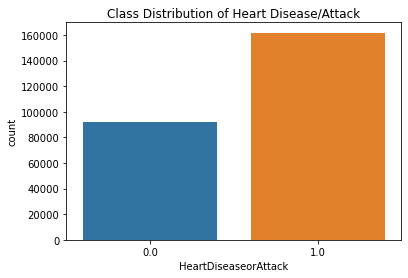

In [15]:
# Class distribution of the output feature
sns.countplot(x='HeartDiseaseorAttack', data=data)
plt.title('Class Distribution of Heart Disease/Attack')
plt.show()

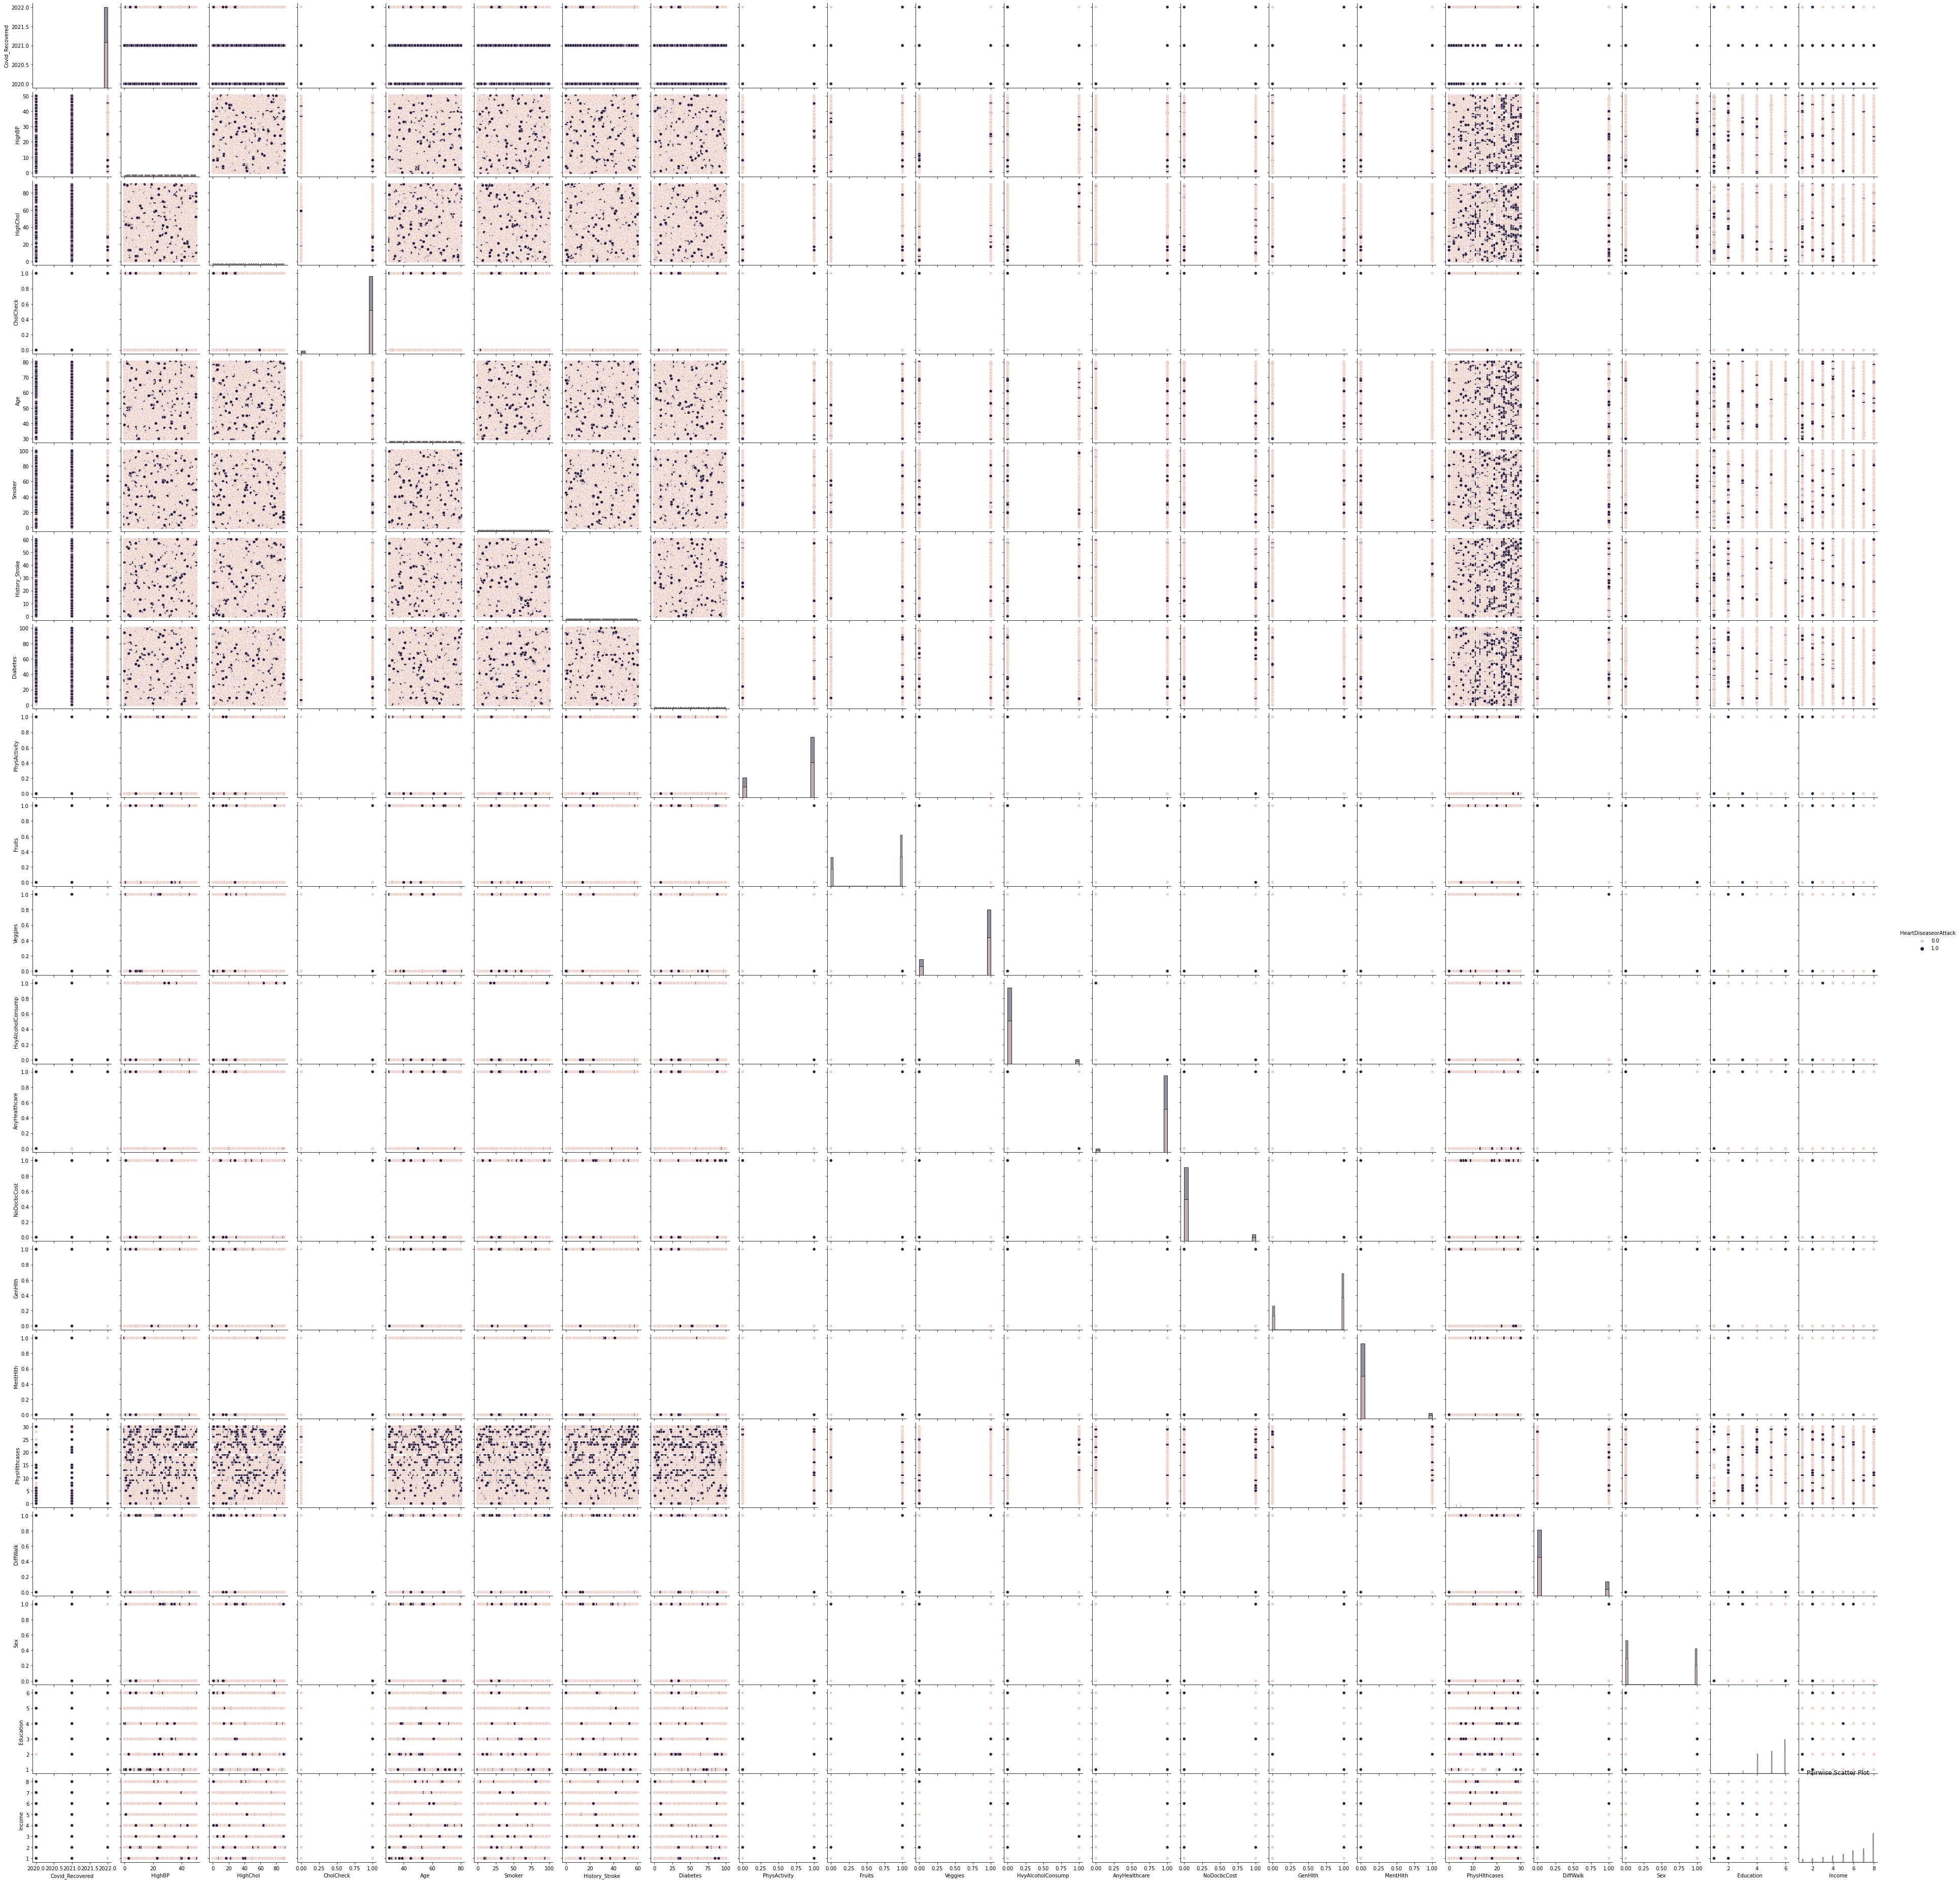

In [16]:
# Pairwise scatter plot for selected input features
selected_features = ['Covid_Recovered', 'HighBP', 'HighChol', 'CholCheck', 'Age', 'Smoker',
                     'History_Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
                     'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                     'MentHlth', 'PhysHlthcases', 'DiffWalk', 'Sex', 'Education', 'Income']
sns.pairplot(data=data[selected_features + ['HeartDiseaseorAttack']], hue='HeartDiseaseorAttack', diag_kind='hist')
plt.title('Pairwise Scatter Plot')
plt.show()

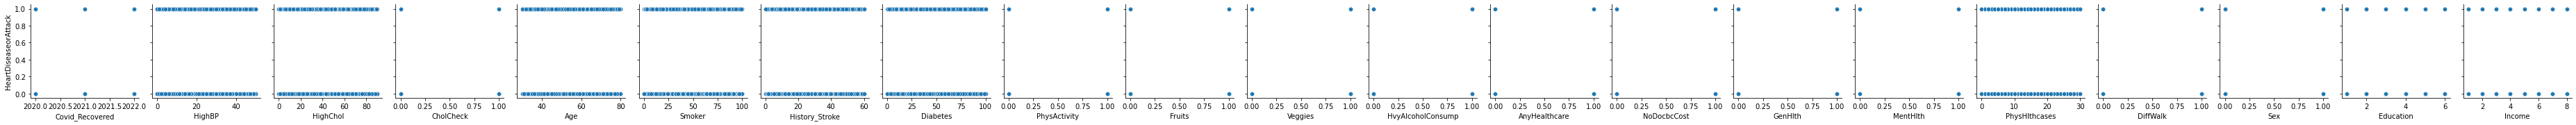

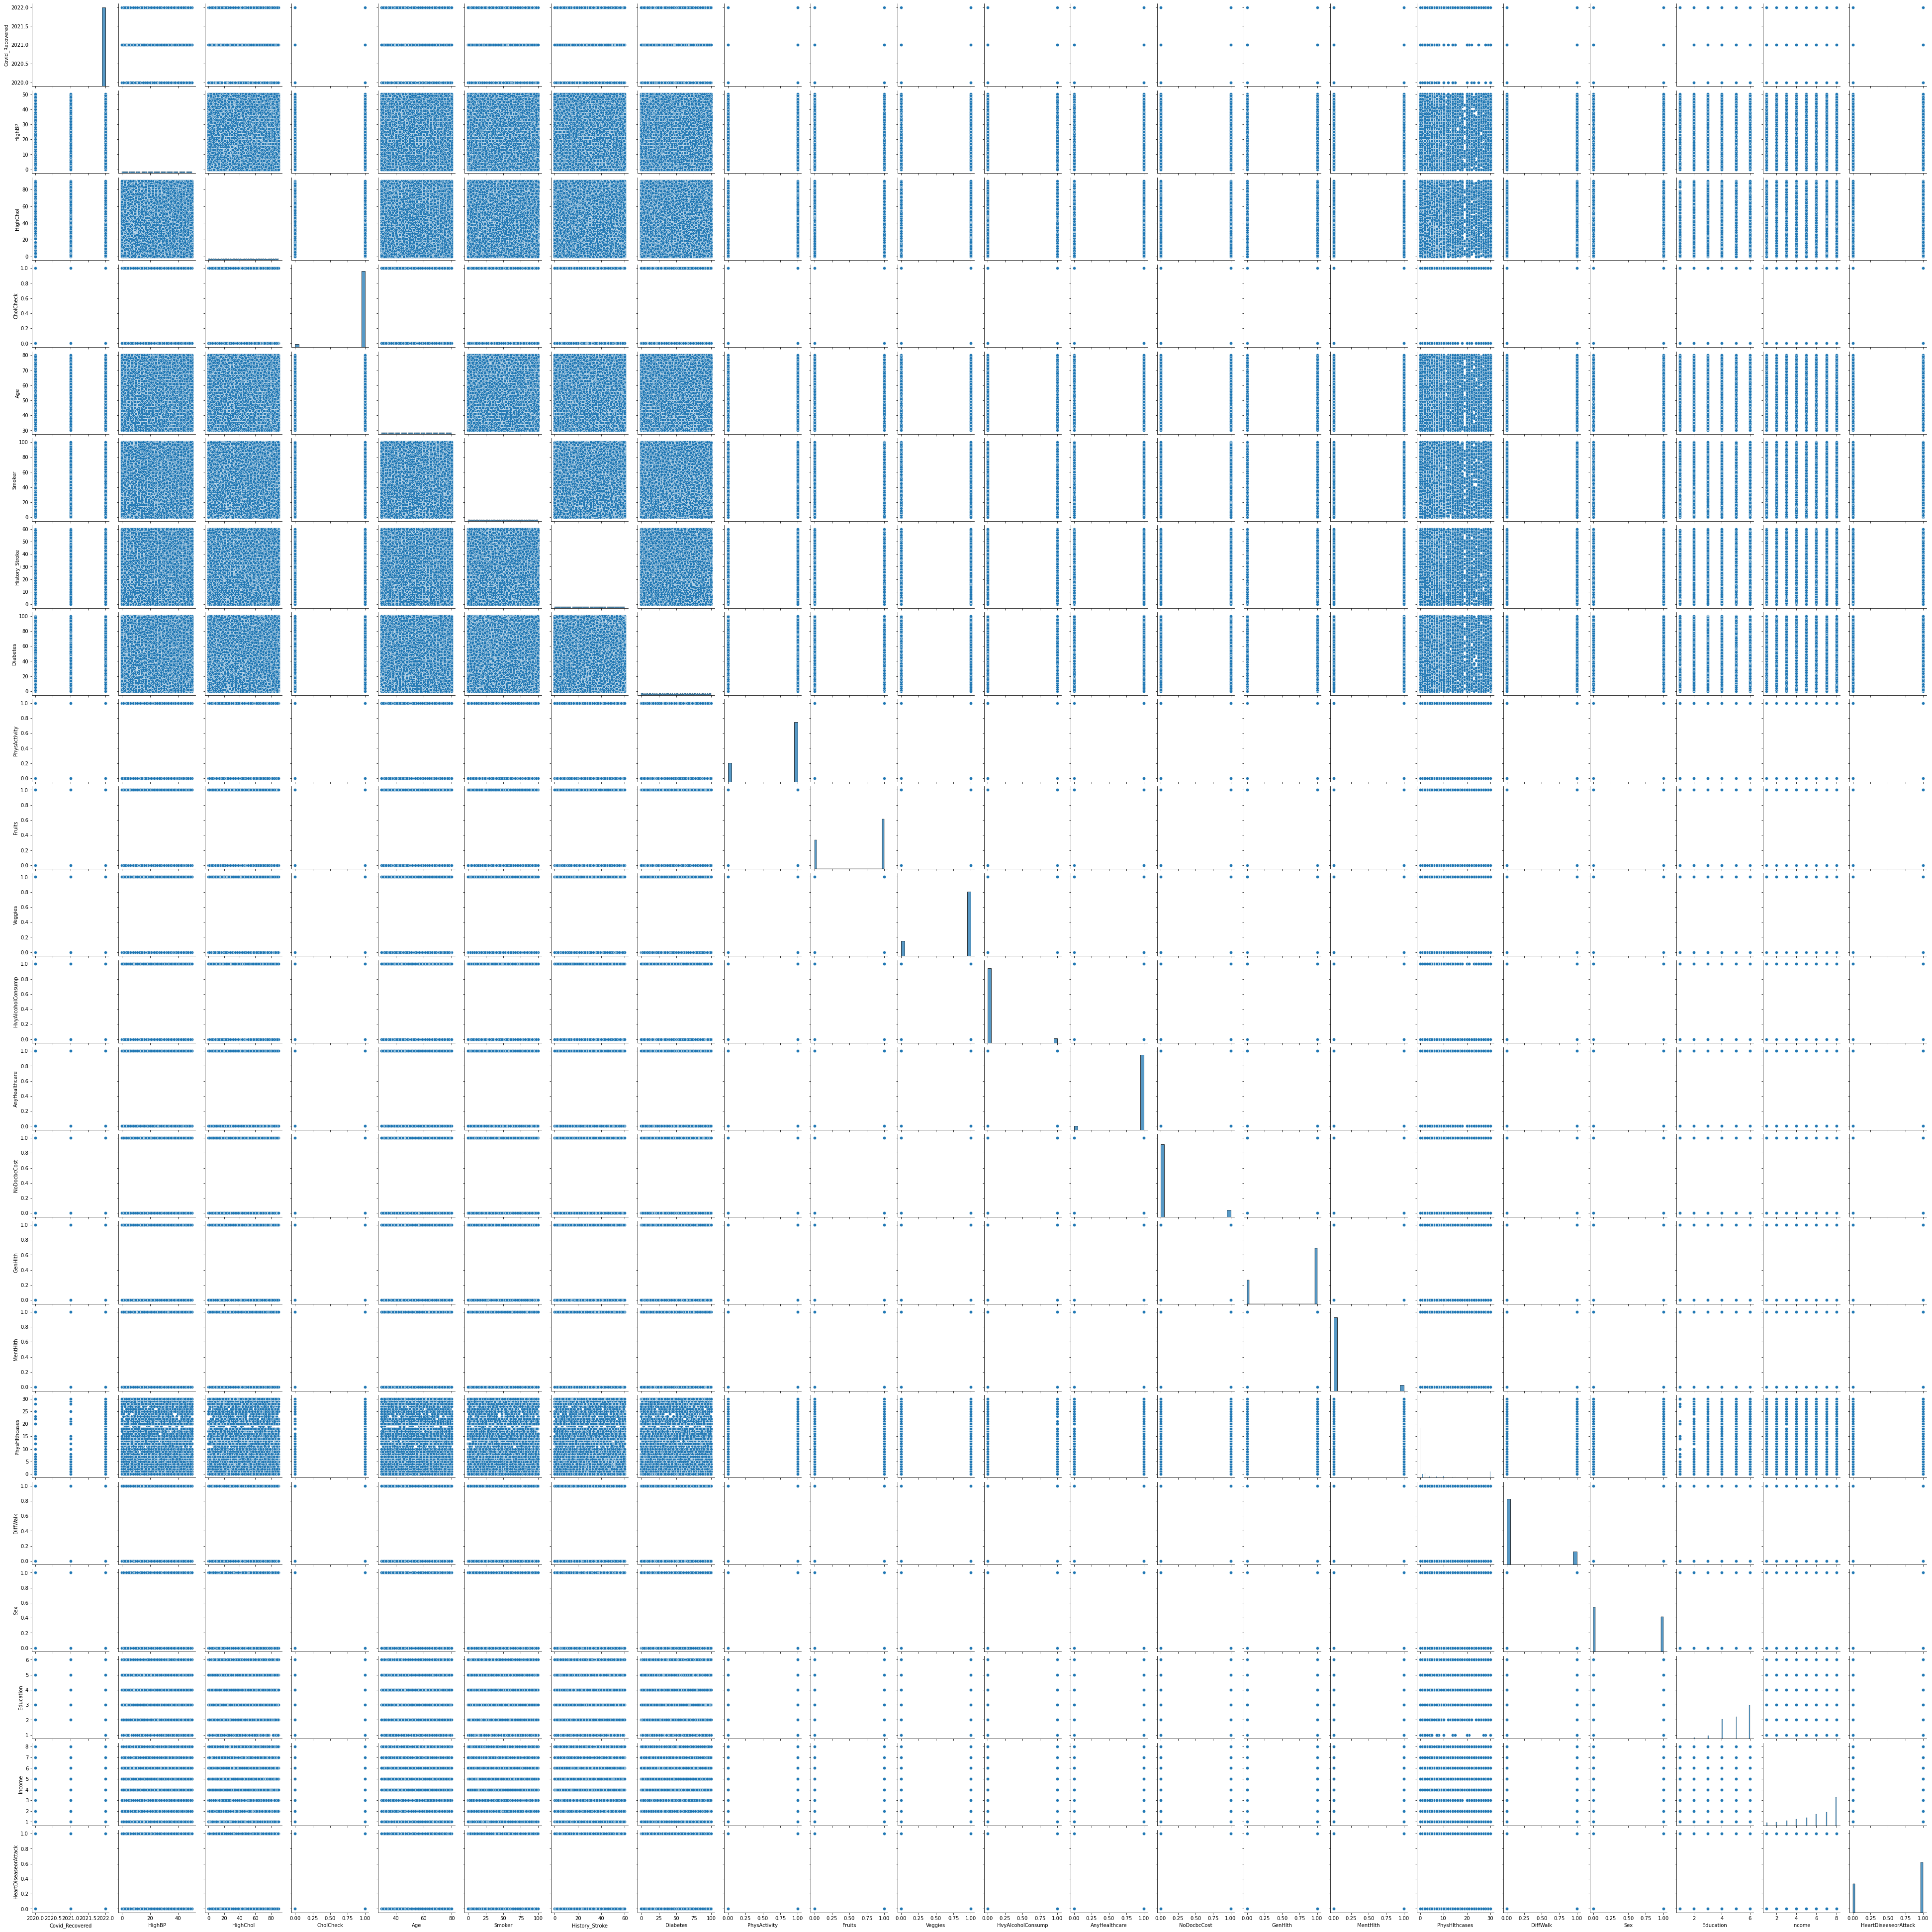

In [17]:
sns.pairplot(data=df, x_vars=['Covid_Recovered', 'HighBP', 'HighChol', 'CholCheck', 'Age', 'Smoker',
       'History_Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlthcases', 'DiffWalk', 'Sex', 'Education', 'Income',], y_vars=['HeartDiseaseorAttack'])
sns.pairplot(df)

Correlation Matrix

In [18]:
# Correlation Matrix to show the relation between the features

corr = df.corr()
corr

Covid_Recovered    HighBP  HighChol  CholCheck  \
Covid_Recovered              1.000000  0.000756  0.002222  -0.004858   
HighBP                       0.000756  1.000000 -0.000319   0.001550   
HighChol                     0.002222 -0.000319  1.000000  -0.002526   
CholCheck                   -0.004858  0.001550 -0.002526   1.000000   
Age                         -0.000354  0.001390  0.001225  -0.000768   
Smoker                      -0.000127 -0.001997 -0.001002   0.002776   
History_Stroke              -0.000249  0.000275  0.001477   0.001083   
Diabetes                     0.002935 -0.000665  0.002569   0.003050   
PhysActivity                 0.011842 -0.001954  0.000801   0.004201   
Fruits                       0.009187 -0.000409 -0.002977   0.023864   
Veggies                      0.006744  0.002847 -0.001169   0.006128   
HvyAlcoholConsump            0.003425  0.000292 -0.001913  -0.023739   
AnyHealthcare               -0.002391 -0.003527 -0.004851   0.117635   
NoDocbcCost                 -0.004624  0.000538  0.001422  -0.058266   
GenHlth                      0.006061  0.001933  0.001319  -0.013212   
MentHlth                     0.003599 -0.002205 -0.002668  -0.007300   
PhysHlthcases               -0.005221 -0.001258 -0.000221   0.031767   
DiffWalk                    -0.019165 -0.000156  0.003977   0.040578   
Sex                          0.009447  0.001977  0.001431  -0.022133   
Education                    0.014355  0.001240  0.002285   0.001513   
Income                       0.015412 -0.001259 -0.001025   0.014278   
HeartDiseaseorAttack         0.020226  0.002875 -0.003137   0.010305   

                           Age    Smoker  History_Stroke  Diabetes  \
Covid_Recovered      -0.000354 -0.000127       -0.000249  0.002935   
HighBP                0.001390 -0.001997        0.000275 -0.000665   
HighChol              0.001225 -0.001002        0.001477  0.002569   
CholCheck            -0.000768  0.002776        0.001083  0.003050   
Age                   1.000000  0.002329       -0.000711 -0.002553   
Smoker                0.002329  1.000000        0.001001  0.000102   
History_Stroke       -0.000711  0.001001        1.000000 -0.003079   
Diabetes             -0.002553  0.000102       -0.003079  1.000000   
PhysActivity          0.000670 -0.004355       -0.001595  0.000124   
Fruits               -0.000675 -0.002710       -0.000694  0.001081   
Veggies              -0.000248 -0.002223       -0.001869  0.004621   
HvyAlcoholConsump    -0.002032  0.000186       -0.000742 -0.000837   
AnyHealthcare         0.002221 -0.000560       -0.000559 -0.001335   
NoDocbcCost          -0.000842  0.000273        0.001262  0.000277   
GenHlth               0.000286  0.000966       -0.001501 -0.000933   
MentHlth              0.000455  0.000151        0.002947  0.002860   
PhysHlthcases         0.003514  0.002367        0.000031 -0.000915   
DiffWalk              0.002271  0.003244        0.000094  0.001327   
Sex                  -0.000927  0.000203       -0.000021 -0.002295   
Education            -0.000736 -0.000753       -0.000214 -0.000676   
Income                0.001242 -0.001777       -0.000230 -0.002059   
HeartDiseaseorAttack  0.001372  0.002505       -0.001477  0.000799   

                      PhysActivity    Fruits  ...  AnyHealthcare  NoDocbcCost  \
Covid_Recovered           0.011842  0.009187  ...      -0.002391    -0.004624   
HighBP                   -0.001954 -0.000409  ...      -0.003527     0.000538   
HighChol                  0.000801 -0.002977  ...      -0.004851     0.001422   
CholCheck                 0.004201  0.023864  ...       0.117635    -0.058266   
Age                       0.000670 -0.000675  ...       0.002221    -0.000842   
Smoker                   -0.004355 -0.002710  ...      -0.000560     0.000273   
History_Stroke           -0.001595 -0.000694  ...      -0.000559     0.001262   
Diabetes                  0.000124  0.001081  ...      -0.001335     0.000277   
PhysActivity             

<AxesSubplot:>

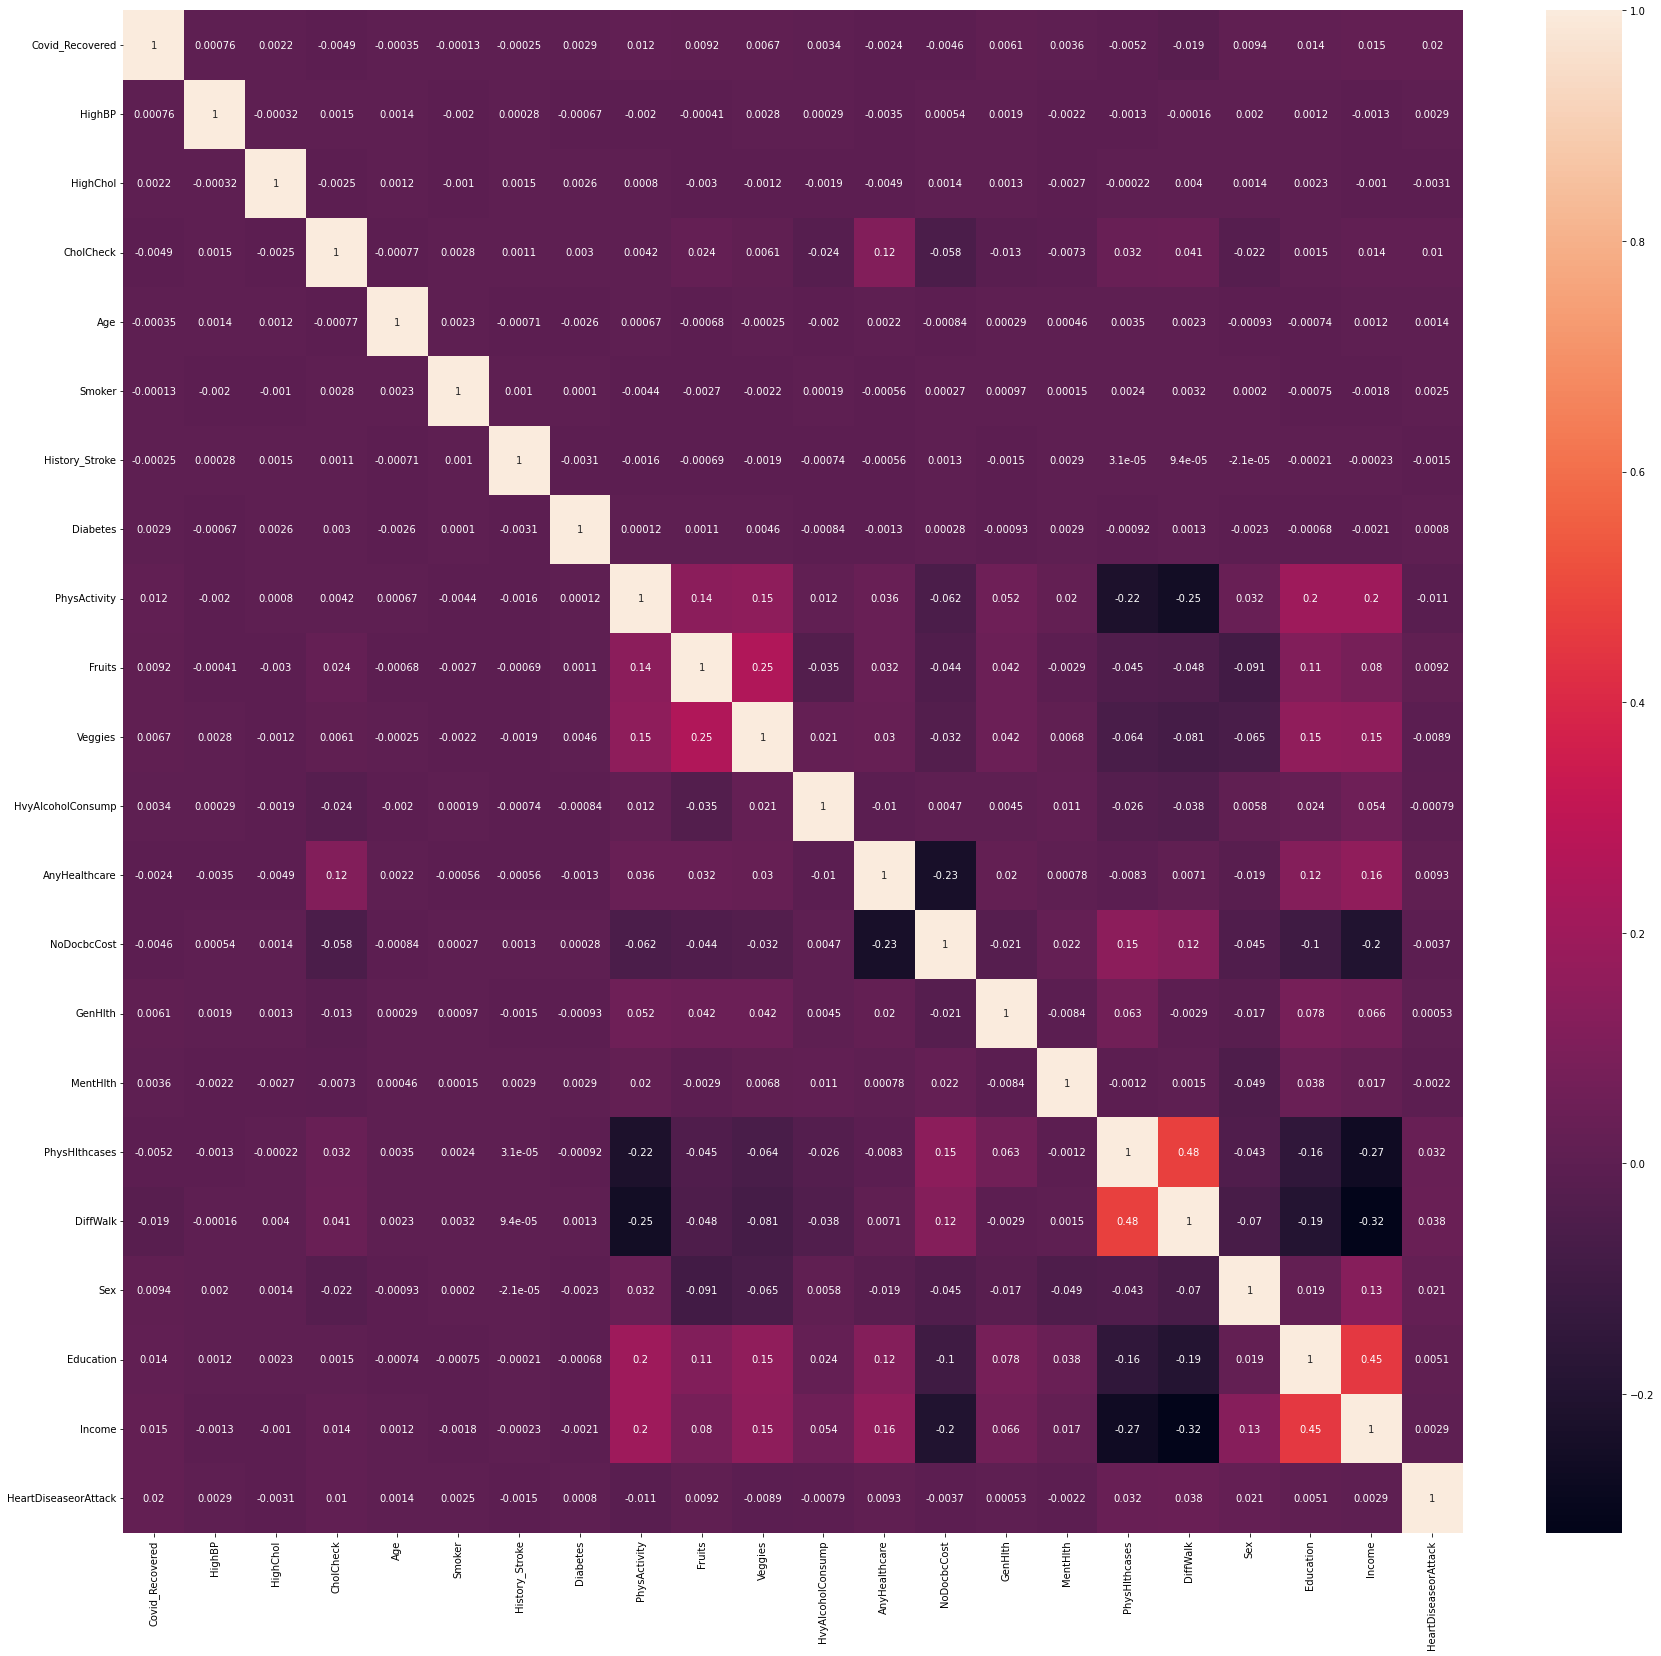

In [19]:
plt.figure(figsize= (30,28))
sns.heatmap(data=corr,annot=True)

Doubt: How to identify which should be given less importance and can be dropped?

Principal Component Analysis

In [20]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [21]:
#Scaled data Mean=0 and SD=1
scaled_data

array([[  0.04518574,   0.74675519,  -0.75880603, ...,  -1.06560988,
         -1.47447987,  -1.32664336],
       [-27.70848893,   1.56276875,   0.65058083, ...,   0.96325106,
         -2.44012815,  -1.32664336],
       [-13.83165159,  -0.61326742,   0.65058083, ...,  -1.06560988,
          0.93964084,  -1.32664336],
       ...,
       [  0.04518574,   0.5427518 ,   0.65058083, ...,  -0.05117941,
         -1.95730401,  -1.32664336],
       [  0.04518574,   0.81475632,   0.49821469, ...,  -0.05117941,
         -2.44012815,  -1.32664336],
       [  0.04518574,  -1.42928098,  -1.21590447, ...,   0.96325106,
         -1.95730401,   0.75378209]])

In [22]:
# Performing PCA
pca = PCA(n_components=2)  # number of principal components
pca_result = pca.fit_transform(scaled_data)

In [23]:
#pca.fit(scaled_data)

In [24]:
#x_pca=pca.transform(scaled_data)

In [25]:
scaled_data.shape

(253670, 22)

In [26]:
pca_result.shape

(253670, 2)

In [27]:
scaled_data

array([[  0.04518574,   0.74675519,  -0.75880603, ...,  -1.06560988,
         -1.47447987,  -1.32664336],
       [-27.70848893,   1.56276875,   0.65058083, ...,   0.96325106,
         -2.44012815,  -1.32664336],
       [-13.83165159,  -0.61326742,   0.65058083, ...,  -1.06560988,
          0.93964084,  -1.32664336],
       ...,
       [  0.04518574,   0.5427518 ,   0.65058083, ...,  -0.05117941,
         -1.95730401,  -1.32664336],
       [  0.04518574,   0.81475632,   0.49821469, ...,  -0.05117941,
         -2.44012815,  -1.32664336],
       [  0.04518574,  -1.42928098,  -1.21590447, ...,   0.96325106,
         -1.95730401,   0.75378209]])

In [28]:
# DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, 3)])

In [29]:
# Displaying the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance)

Explained Variance Ratio for each Principal Component:
[0.10592232 0.06080722]


In [30]:
# Displaying the PCA DataFrame
print("\nPCA Result:")
print(pca_df.head())


PCA Result:
        PC1       PC2
0  3.110956 -1.304298
1  3.216788  4.602010
2  4.128188 -1.516452
3  0.594843 -0.595457
4  0.253293 -0.913127


# Modeling

In [33]:
## create the feature matrix X by dropping certain columns from the data

X = df.drop('Education', axis=1)
#X = X.drop('Income', axis=1)
#X = X.drop('Fruits', axis=1)
#X = X.drop('Veggies', axis=1)
X = X.drop('DiffWalk', axis=1)
#X = X.drop('CholCheck', axis=1)

X

Covid_Recovered  HighBP  HighChol  CholCheck   Age  Smoker  \
0                2022.0    36.0      25.0        1.0  46.0    94.0   
1                2020.0    48.0      62.0        0.0  62.0    19.0   
2                2021.0    16.0      62.0        1.0  51.0    54.0   
3                2020.0     4.0      61.0        1.0  66.0    47.0   
4                2020.0    37.0      77.0        1.0  78.0    68.0   
...                 ...     ...       ...        ...   ...     ...   
253675           2022.0    44.0      82.0        1.0  43.0     7.0   
253676           2022.0    47.0      67.0        1.0  77.0    74.0   
253677           2022.0    33.0      62.0        1.0  59.0    12.0   
253678           2022.0    37.0      58.0        1.0  33.0    48.0   
253679           2022.0     4.0      13.0        1.0  68.0    19.0   

        History_Stroke  Diabetes  PhysActivity  Fruits  Veggies  \
0                 49.0      69.0           0.0     0.0      1.0   
1                 30.0     100.0           1.0     0.0      0.0   
2                 28.0      91.0           0.0     1.0      0.0   
3                 12.0       7.0           1.0     1.0      1.0   
4                 43.0       8.0           1.0     1.0      1.0   
...                ...       ...           ...     ...      ...   
253675             5.0      72.0           0.0     1.0      1.0   
253676            55.0      45.0           0.0     0.0      0.0   
253677            26.0      28.0           1.0     1.0      0.0   
253678            56.0      43.0           0.0     1.0      1.0   
253679             0.0      34.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      1.0       1.0   
1                     0.0            0.0          1.0      0.0       0.0   
2                     0.0            1.0          1.0      1.0       0.0   
3                     0.0            1.0          0.0      1.0       0.0   
4                     0.0            1.0          0.0      1.0       0.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      0.0       0.0   
253676                0.0            1.0          0.0      1.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      0.0       0.0   
253679                0.0            1.0          0.0      1.0       0.0   

        PhysHlthcases  Sex  Income  HeartDiseaseorAttack  
0                15.0  0.0     3.0                   0.0  
1                 0.0  0.0     1.0                   0.0  
2                30.0  0.0     8.0                   0.0  
3                 0.0  0.0     6.0                   0.0  
4                 0.0  0.0     4.0                   0.0  
...               ...  ...     ...                   ...  
253675            5.0  1.0     7.0                   0.0  
253676            0.0  0.0     4.0                   0.0  
253677            0.0  0.0     2.0                   0.0  
253678            0.0  1.0     1.0                   0.0  
253679            0.0  0.0     2.0                   1.0  

[253670 rows x 20 columns]

In [34]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, df['HeartDiseaseorAttack'], shuffle=True, test_size=0.2, random_state=42)



# create a logistic regression model and fit it to the training data

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Define the number of folds for cross-validation
#k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Calculate the F1 score using cross-validation
f1_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1')

# make predictions on the test data using the logistic regression model

y_pred = lr.predict(X_test)

# print the accuracy score and confusion matrix for the logistic regression model

##print("Accuracy: ", accuracy_score(y_test, y_pred))
##print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

# Print the mean and standard deviation of the F1 scores for logistic regression model
print('F1 Score_Logistic (mean):', np.mean(f1_scores))
print('F1 Score_Logistic (std):', np.std(f1_scores))

C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

F1 Score_Logistic (mean): 0.9999845518093693
F1 Score_Logistic (std): 3.089638126132499e-05


C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# create a decision tree classifier model and fit it to the training data


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Calculate the F1 score using cross-validation
f1_scoresdt = cross_val_score(dtc, X_train, y_train, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores for decision tree classifier model
print('F1 Score (mean):', np.mean(f1_scoresdt))
print('F1 Score (std):', np.std(f1_scoresdt))

F1 Score (mean): 1.0
F1 Score (std): 0.0


In [36]:
# create a random forest classifier model and fit it to the training data

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Calculate the F1 score using cross-validation
f1_scoresrf = cross_val_score(rfc, X_train, y_train, cv=10, scoring='f1_macro')

# Print the mean and standard deviation of the F1 scores for random forest classifier model
print('F1 Score (mean):', np.mean(f1_scoresrf))
print('F1 Score (std):', np.std(f1_scoresrf))

F1 Score (mean): 1.0
F1 Score (std): 0.0


# Predictions

In [37]:
# making predictions on the test data using the decision tree and random forest models

#y_pred = dtc.predict(X_test)
#y_pred_binary = (y_pred >= 0.5).astype(int)

y_pred = dtc.predict(X_test)


# print the predictions from the decision tree and random forest models

print('Decision tree predictions:', y_pred)
#print("F1 Score:", f1_scoresdt(y_test, y_pred_binary))

##y_pred = rfc.predict(X_test)
y_pred = rfc.predict(X_test)
##y_pred_binary = (y_pred >= 0.5).astype(int)

print('Random forest predictions:', y_pred)
##print("F1 Score:", f1_scoresrf(y_test, y_pred_binary))


Decision tree predictions: [0. 0. 0. ... 1. 1. 0.]
Random forest predictions: [0. 0. 0. ... 1. 1. 0.]
